<a href="https://colab.research.google.com/github/DSC-LSU/TensorFlow-Workshop/blob/main/TensorFlow_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Welcome to the GDSC TensorFlow Workshop***
---
## **What is TensorFlow?**
TensorFlow is a powerful open-source software library created by Google Brain team for numerical computations and building machine learning models. It is widely used by researchers, developers, and data scientists to design, train, and deploy artificial neural networks and other machine learning algorithms.

> *TensorFlow is designed to work with a wide range of programming languages like Python, C++, and Java, and can be deployed on various platforms, including desktop computers, servers, mobile devices, and even on the web.*

## **Why TensorFlow?**
TensorFlow has proven to be effective in solving complex problems. Its pre-trained models and APIs make it easier to get started with machine learning and reduce the amount of time required for development.

> Some of the popular applications of TensorFlow include:

* Image Recognition
* Natural Language Processing
* Speech Recognition
* Recommendation Algorithms
* Healthcare Diagnostic Tools
* Entertainment Analytics
* And much much more...







## **Introduction to Deep Learning**
Deep learning involves training artificial neural networks to learn from data, extract meaningful features, and make predictions or decisions. Deep learning algorithms use multiple layers of interconnected nodes (neurons) to learn increasingly complex representations of the data. 

> These layers are typically organized in a hierarchical manner, with each layer learning from the previous one.


---


## **Role of TensorFlow in Creating Deep Learning Models**
TensorFlow provides a set of tools and APIs for building, training, and deploying neural networks. It allows developers to build models using a high-level API or by defining the network architecture using lower-level APIs.

> TensorFlow also provides a range of pre-trained models that can be used for a variety of tasks.

### *Low-Level API Example*
*Network Architecture must be defined when building the entire network from scratch.*
```
# Hidden layer
z1 = tf.add(tf.matmul(X, w1), b1)
a1 = tf.nn.relu(z1)

# Output layer
z2 = tf.add(tf.matmul(a1, w2), b2)
y_pred = tf.nn.softmax(z2)
y_one_hot = tf.one_hot(y, 3)

# Define loss function
loss = tf.losses.softmax_cross_entropy(y, y_pred, reduction=tf.losses.Reduction.MEAN)

# Define optimizer
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

# Metric
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, axis=1), tf.argmax(y_pred, axis=1)), tf.float32))

# Using Graph for training
for _ in range(n_epochs):
    sess.run(optimizer, feed_dict={X: X_train, y: y_train})
```

### *High-Level API Example*
*When using tensorflow network architectures you can focus on building just the model for your specific applications.*
```
def model_fn(features, labels, mode):
    X = features['x']
    
    # Define weights initializer
    kernel_initializer = tf.initializers.truncated_normal(stddev=0.1)
 
    # Define network  
    hidden = tf.layers.dense(
        X, 2, activation=tf.nn.relu, 
        kernel_initializer=kernel_initializer)
    
    logits = tf.layers.dense(
        hidden, 3, 
        kernel_initializer=kernel_initializer)

    # Define dictionary with predicted class and probs for each class
    predictions = {
        'class': tf.argmax(logits, axis=1),
        'probabilities': tf.nn.softmax(logits)
    }

    # Return estimator specification with loss and metrics ops 
    return tf.estimator.EstimatorSpec(
        mode, loss=loss, eval_metric_ops=eval_metric_ops
```
### *Predefined Model Example*
*You can use Deep Neural Network Classifier to work with a variety of TensorFlow's predefined models.*
```
feature_columns = [
    tf.feature_column.numeric_column("x", shape=[4])]

classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[2],
    n_classes=3,
    model_dir="/tmp/my_model")

classifier.train(input_fn=input_fn)
```


---


## **Types of Neural Networks**
There are several types of neural networks, each designed for specific use cases. Some of the most popular types are:

***Feedforward Neural Networks***
* Most basic neural network.
* One input layer, one or more hidden layers, and an output layer.
* Commonly used for classification and regression tasks.
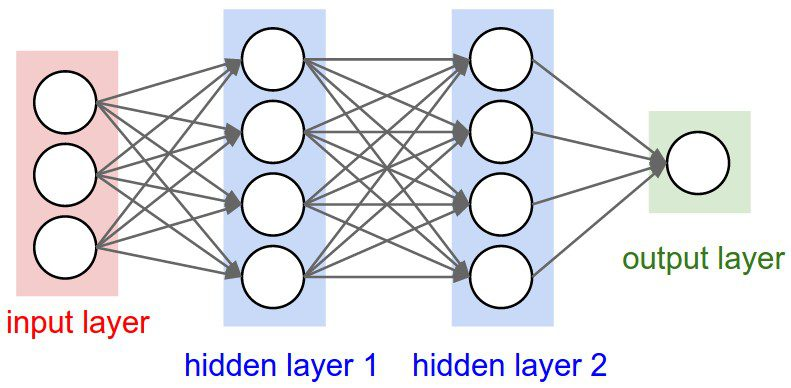

***Convolutional Neural Networks (CNNs)***
* Uses convolutional layers to extract features from the input images.
* One or more fully connected layers for classification.
* CNNs are commonly used for image and video analysis.
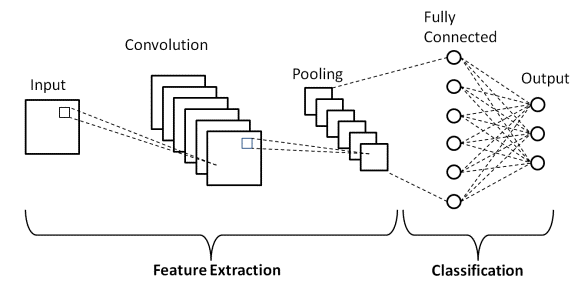

***Recurrent Neural Networks (RNNs)***
* RNNs are designed for sequence data.
* Uses a feedback loop to process sequence data and remember previous inputs
* Useful for tasks such as speech recognition and language translation.
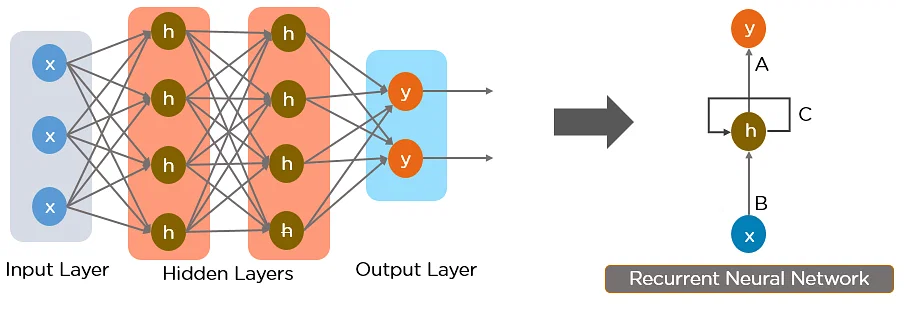

***Generative Adversarial Networks (GANs)***
* Used for generating new data like images or text.
* GANs consist of two neural networks:
 - One generates fake data
 - One discriminates between real and fake data
* Useful for research studies, image/video synthesis, and data augmentation for other models.
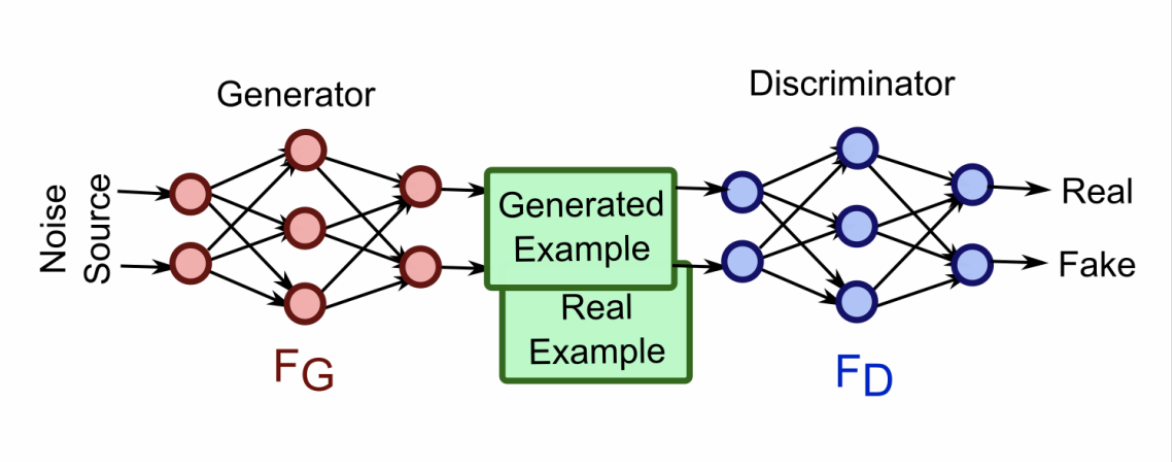





## Keras

Keras is a high-level neural network API that can be used with TensorFlow as a backend. 

It provides a simple and intuitive interface for building and training deep learning models, allowing developers to quickly experiment with different architectures.

**Benefits:**
*   Keras supports a wide range of neural network architectures.
*   It supports both CPU and GPU acceleration.
* ***Keras can be used as a high-level API on top of TensorFlow.***
* Keras provides a simple and intuitive API.

In addition to Keras, there are many other complimentary libraries that can be used with TensorFlow to build and train deep learning models. Some of these libraries include:


*   **TensorBoard:** virtualization tools
*   **TensorFlow Probability:** prob. tools
*   **TensorFlow Hub:** repo of pre-trained models
*   **TensorFlow Lite:** lightweight TF for mobile and embedded devices

*Overall, the combination of TensorFlow and its complimentary libraries provides a powerful platform for building and training deep learning models for a wide range of applications.* 

*Keras has been used at YouTube, NASA, Netflix, Uber, Yelp, Instacart, Zocdoc, Twitter, Square/Block, and many more big companies. Especially in startups centered around deep learning.*







# Initialization
---

*The first step to training your own model*

In [ ]:
import numpy as np                # Numerical computing methods for arrays, matrices, and graphs
import seaborn as sns             # Data virtualization tools for creating aesthetically pleasing statistical graphics
import tensorflow as tf           # TensorFlow
from tensorflow import keras      # Keras
import matplotlib.pyplot as plt   # Plotting methods for creating static, animated, and interactive visualizations

Import all necessary dependenancies. <br/>
You can find specific dependencies and their docs here:


*   [Github Repo of Popular Dependencies](https://github.com/pragmagrid/tensorflow)



In [ ]:
# mnist is an pre-built dataset in keras
mnist = tf.keras.datasets.mnist.load_data

(x_train, y_train), (x_test, y_test) = mnist()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
labels = ['zero','one','two','three','four','five','six','seven','eight','nine']

We're loading up a ***Keras*** pre-built ***MNIST*** dataset, which has a collection of images of handwritten digits, and their corresponding labels.

* [MNIST Dataset Keras Docs](https://keras.io/api/datasets/mnist/)  

We then unpack the training and testing data and their corresponding labels into separate variables. The following lines normalize the pixel values of the images by dividing by the pixel size.

This is a common preprocessing step to ensure the input data has a consistent scale and make it easier for the neural network to learn from the data.


# Model Architecture
---

*Initializing the configurations for the CNN model*

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),#28x28xnone
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation = 'relu'), 
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

We define the CNN architecture of our model using the Sequential class from Keras API.

Our model will have three layers of neurons and one layer for formatting: 

* The first layer will flatten our input images (28x28 pixels)
* The next two layers will have 256 and 128 neurons for training
  * These layers will use the "relu" activation function, which makes sure that the output of each neuron is positive.
* The last layer will have 10 neurons, which will correspond to our 10 possible classes (the digits 0 through 9).
  *  This layer will use the "softmax" activation function, which will make sure that the output of each neuron is a probability that the input belongs to that class.

> *We'll also add a couple of dropout layers to prevent overfitting.*
<br/>


Next we compile our model by specifying the optimizer, loss function, and metrics that we'll use during training. 

* We'll use the Adam optimizer, a popular optimizer that adjusts the learning rate during training to improve performance. 
* Our loss function will be 'sparse_categorical_crossentropy', which is just a way to measure how well our model is doing at predicting the correct class.
* Lastly, we'll track the accuracy metrics of our model during training.

Using ```model.summary()``` we can output our performance parameters for each layer.

Lets see how our Model ran!

<br/>

**NOTE :**

> RNN MODEL :


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trai

***Model ran smoothly!***

Now, we're ready to train our model and see how well it does at recognizing those digits!

In [ ]:
training_Model = model.fit(
    x_train, y_train, batch_size = 64, 
    epochs = 4,
    validation_data = (x_test,y_test)
)

Epoch 1/4
938/938 [==============================] - 8s 8ms/step - loss: 1.9105 - accuracy: 0.3951 - val_loss: 1.3707 - val_accuracy: 0.7546
Epoch 2/4
938/938 [==============================] - 8s 8ms/step - loss: 1.1987 - accuracy: 0.6830 - val_loss: 0.8000 - val_accuracy: 0.8297
Epoch 3/4
938/938 [==============================] - 7s 7ms/step - loss: 0.8451 - accuracy: 0.7636 - val_loss: 0.5734 - val_accuracy: 0.8672
Epoch 4/4
938/938 [==============================] - 8s 8ms/step - loss: 0.6754 - accuracy: 0.8051 - val_loss: 0.4669 - val_accuracy: 0.8854


***Let's get this model trained!***

We're going to use the ```model.fit()``` method from Keras API to train our neural network by initializing vital configurations. 

*   The x_train and y_train variables are the input images and their corresponding labels, respectively.
*   We used a batch size of 64, which means we'll update our weights and biases after every 64 examples.
*   We trained our model for 4 epochs, which means we'll go through the entire training set 4 times. 
*   We also used the validation_data parameter to evaluate our model on a separate validation set of data, consisting of x_test and y_test.

The ```model.fit()``` method will update the weights and biases of our model after each batch, using the optimizer and loss function we specified earlier. 

***Our goal is to minimize the loss function and increase the accuracy of our model on both the training and validation sets.***

# Plotting and Formatting


---

*It's time to evaluate our neural network and see how the training is doing, using our imported plotting methods!*

loss: [1.9105007648468018, 1.1987025737762451, 0.8451128005981445, 0.6754409074783325]
accuracy: [0.3950999975204468, 0.6830166578292847, 0.763616681098938, 0.8050833344459534]
val_loss: [1.3707259893417358, 0.8000379204750061, 0.5734087228775024, 0.46686968207359314]
val_accuracy: [0.7545999884605408, 0.8296999931335449, 0.8672000169754028, 0.8853999972343445]


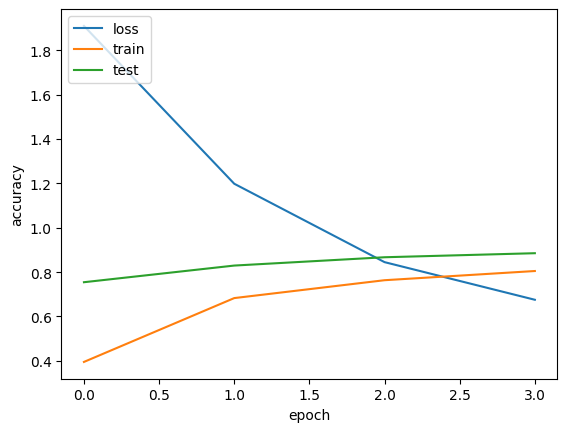

In [ ]:
loss = training_Model.history['loss']
accuracy = training_Model.history['accuracy']
value_accuracy = training_Model.history['val_accuracy']
plt.plot(loss)
plt.plot(accuracy)
plt.plot(value_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['loss','train', 'test'], loc='upper left')

for spec in training_Model.history:
  print("{0}: {1}".format(spec, training_Model.history[spec])) 

First we access the history of our training model process to get the loss, training accuracy, and validation accuracy values that were calculated during training.

Then, we used the matplotlib library methods to plot these values on a graph so we can visualize how our model's performance changed over time (epochs).

> *We used different colors for each value to make the graph easier to read, and add a legend to show what each line represents.*

Finally, we printed out the history of our training model so we can see all the different metrics that we were tracking during training. 

> *This will help us understand how our model performed and where we can improve it in the future.*




# Results
---

*It's time for the moment of truth... Let's see how our trained neural network performs on a random test image!*

1/1 [==============================] - 0s 64ms/step


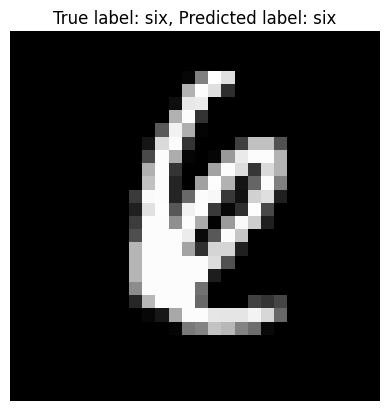

In [ ]:
# Choose a random test image to make a prediction on
index = np.random.randint(len(x_test))
test_image = x_test[index]
true_label = y_test[index]

# Make a prediction on the test image using the trained model
predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

# Display the test image and print the true and predicted labels
plt.imshow(test_image, cmap='gray')
plt.title(f'True label: {labels[true_label]}, Predicted label: {labels[predicted_label]}')
plt.axis('off')
plt.show()

We randomly selected an image from our test dataset and store it in a variable called test_image. We'll also store the true label of the image in a variable called true_label for verification.

Next, we used our trained model to make a prediction on the test image by using the predict method on our model and passing in the test_image after expanding its dimensions with ```np.expand_dims()```. 

> This will give us an array of predicted probabilities for each possible label.

We used ```np.argmax()``` to get the index of the highest probability, which will correspond to the predicted label and give us a result!



### Here's a script to run our model in a loop to test consistency

1/1 [==============================] - 0s 111ms/step
True label: eight, Predicted label: eight
1/1 [==============================] - 0s 24ms/step
True label: five, Predicted label: five
1/1 [==============================] - 0s 21ms/step
True label: eight, Predicted label: nine


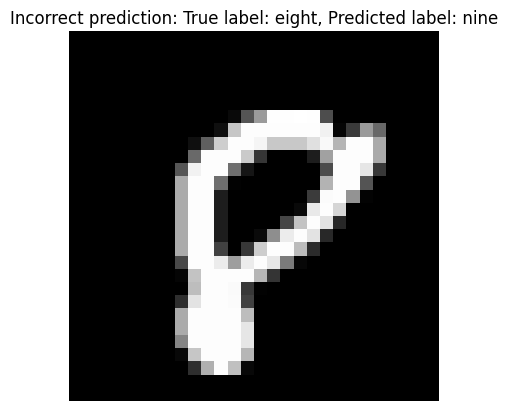

1/1 [==============================] - 0s 25ms/step
True label: three, Predicted label: three
1/1 [==============================] - 0s 21ms/step
True label: one, Predicted label: one


In [ ]:
# Generate 5 random indices for test images
indices = np.random.randint(len(x_test), size=5)

for i in indices:
    # Retrieve the test image and true label
    test_image = x_test[i]
    true_label = y_test[i]

    # Make a prediction on the test image using the trained model
    predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
    predicted_label = np.argmax(predicted_probabilities)

    # Print the true and predicted labels
    print(f"True label: {labels[true_label]}, Predicted label: {labels[predicted_label]}")

    # If the prediction is incorrect, display the image
    if predicted_label != true_label:
        plt.imshow(test_image, cmap='gray')
        plt.title(f'Incorrect prediction: True label: {labels[true_label]}, Predicted label: {labels[predicted_label]}')
        plt.axis('off')
        plt.show()


# Kaggle

Kaggle is a powerful platform for data scientists and machine learning enthusiasts, providing access to datasets, collaboration tools, competitions, and learning resources.

It provides a range of tools and resources for building and training machine learning models, including a cloud-based Jupyter notebook environment and a large dataset repository.
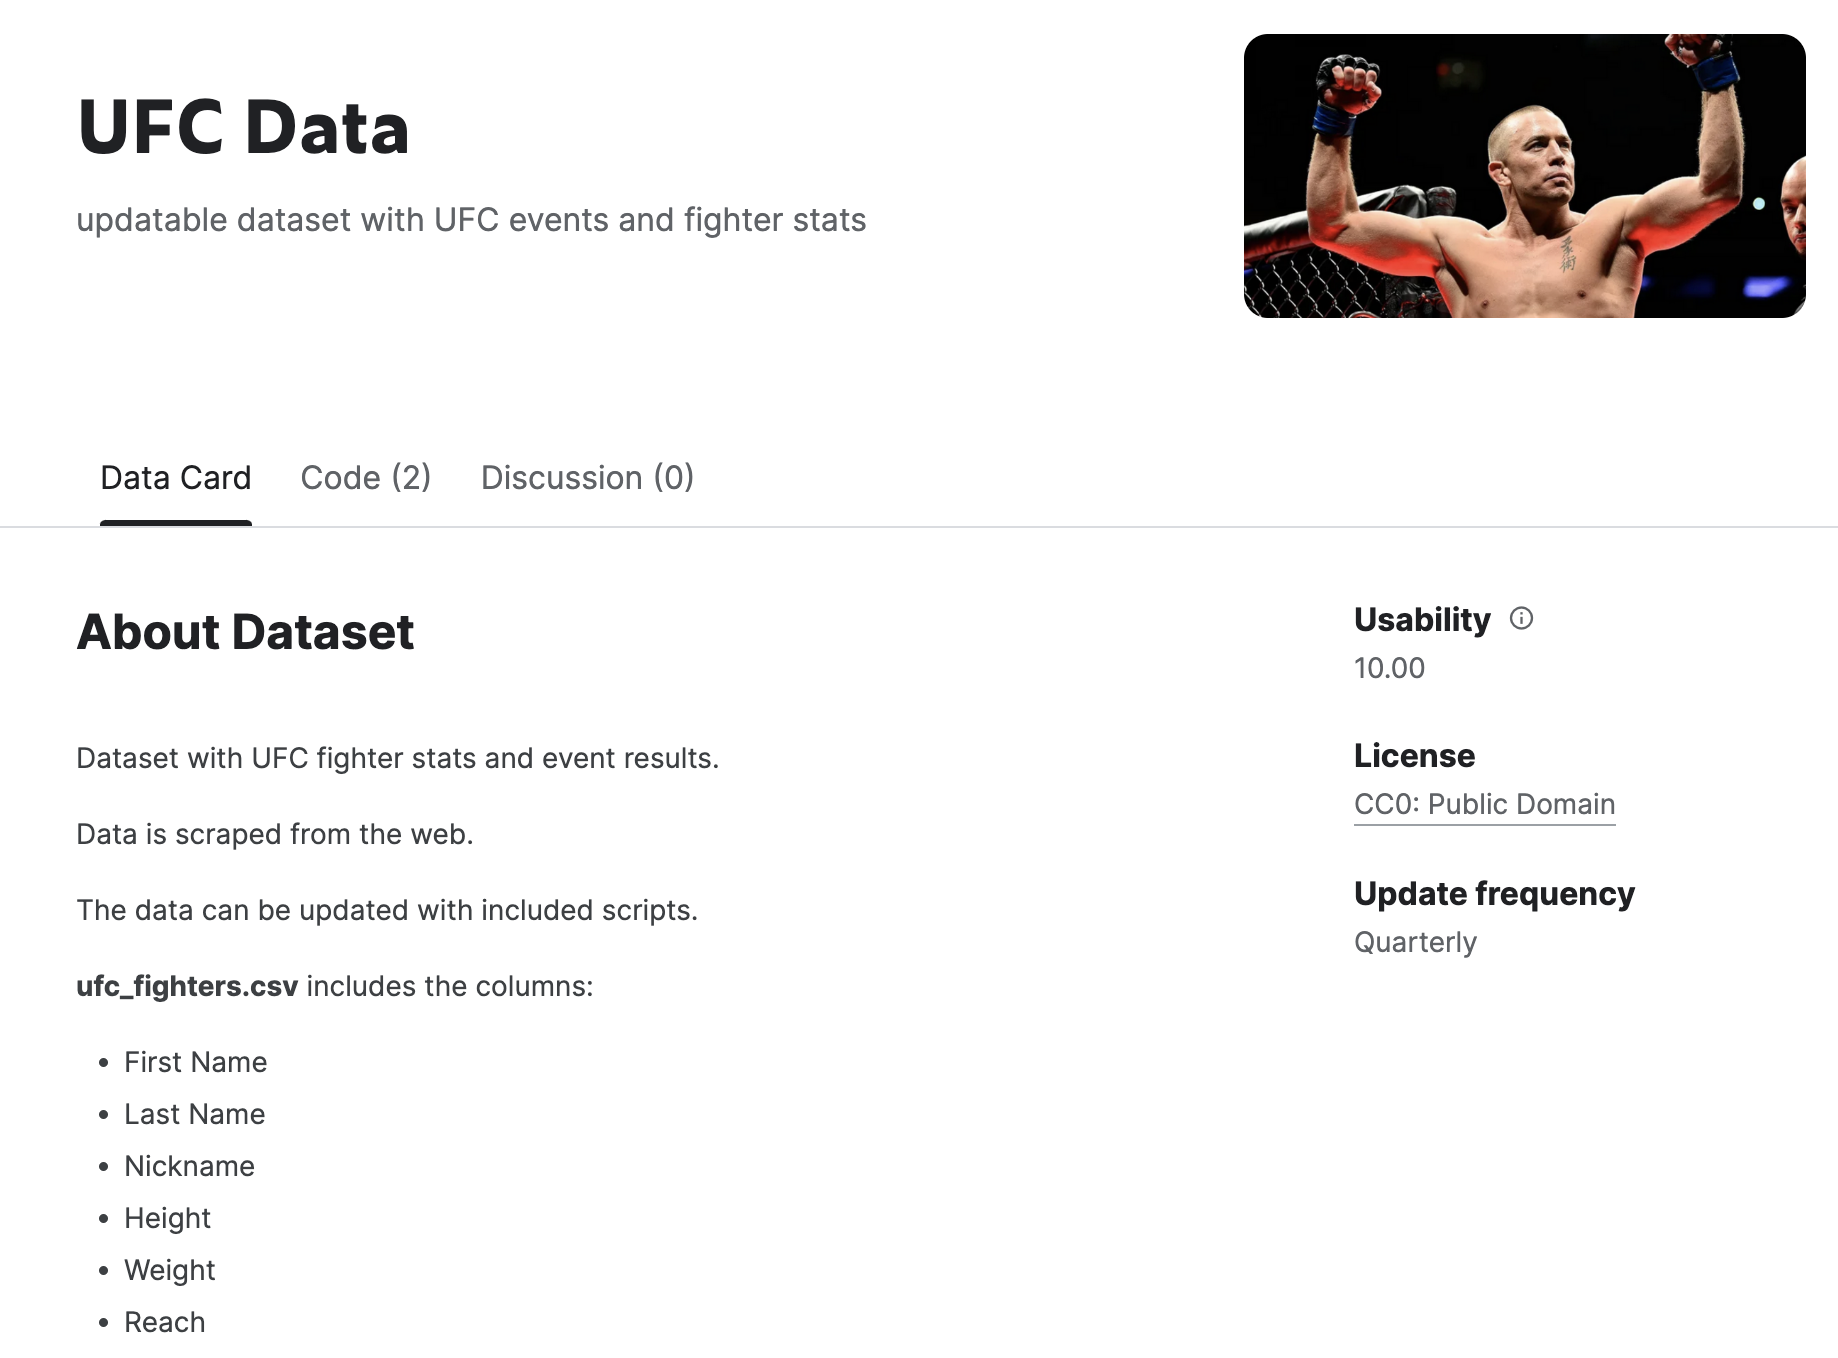
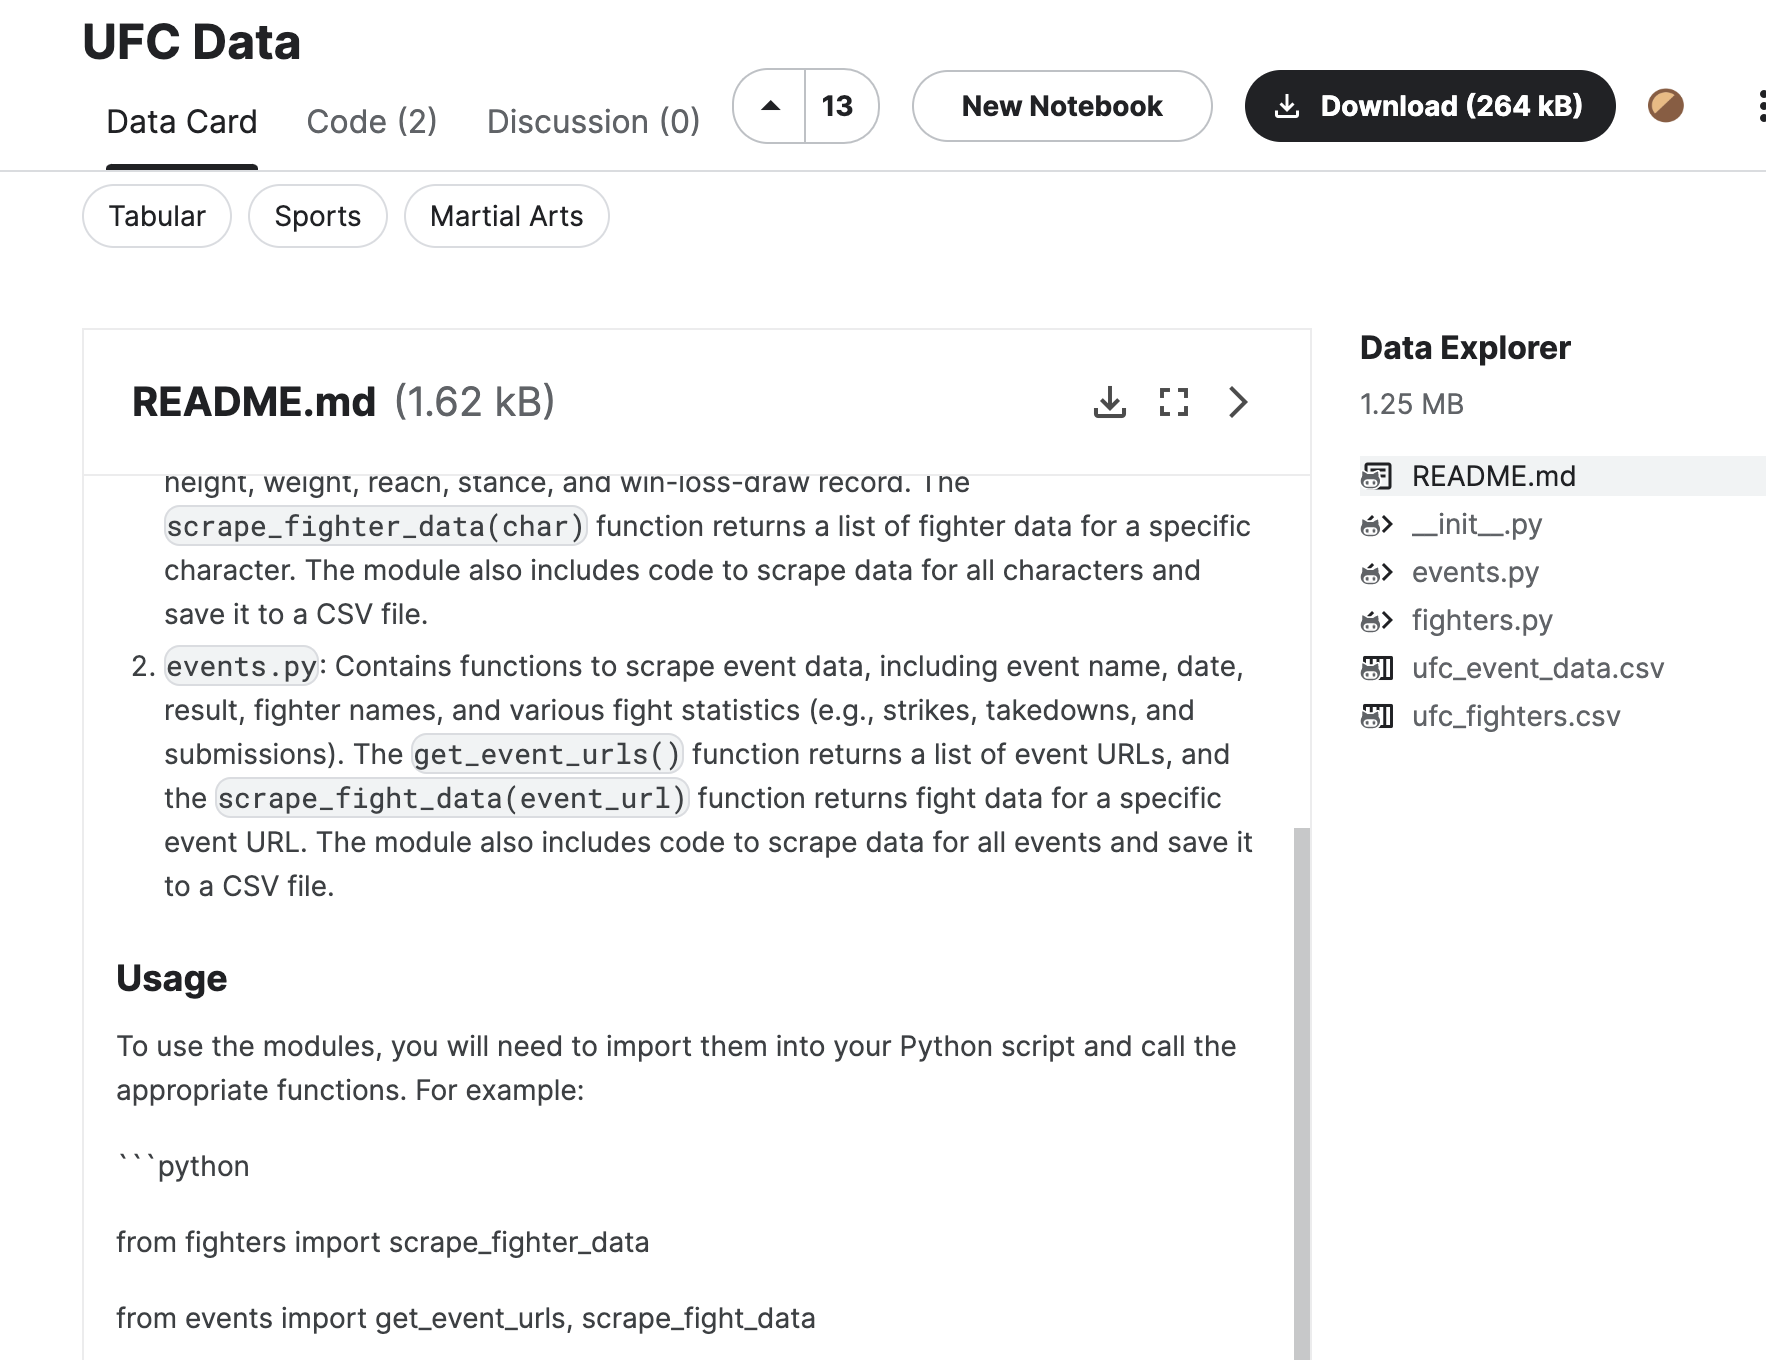
**How to access Kaggle:** 
[Kaggle Docs](https://www.kaggle.com/docs/api)

In addition to Kaggle's core platform, there are many other tools and libraries that can be used for machine learning, including popular Python libraries like ***scikit-learn***, ***TensorFlow***, and ***PyTorch***.

In [ ]:
!pip install -q kaggle

In [ ]:
train_data = keras.preprocessing.image_dataset_from_directory(
    'path/to/train/directory',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(128, 128))